In [2]:
import pandas as pd
import numpy as np

In [3]:
from imdbpie import Imdb

We use the IMDB API called imdbpie to retrieve data from the website. However, the goal is to get random data, and to predict which movies will be popular and which will not be.

In [4]:
imdb = Imdb()
imdb = Imdb(anonymize=True)


In [5]:
top250 = pd.DataFrame(imdb.top_250())

In [6]:
top250.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'https://images-na.ssl-images-amazon...,1730915,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'https://images-na.ssl-images-amazon...,1182761,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'https://images-na.ssl-images-amazon...,811039,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'https://images-na.ssl-images-amazon...,1715862,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'https://images-na.ssl-images-amazon...,462049,8.9,tt0050083,12 Angry Men,feature,1957


The structure of movie ID's in the IMDB database seems to have a fixed structure: the id starts with tt, followed by 7 integers. To make sure that we get random movies, we set random integers to get random movies. However, looking at the data it can be observed that the first number of the movie id never seems to be higher than 3: this is why the first number of the ID is set to be random in the range of 0 to 3.

In [40]:
movie_count = 0
df = pd.DataFrame()
for i in range(5):
    id_ = 'tt'+str(0)+str(np.random.randint(0,4))+''.join(["%s" % np.random.randint(0, 9) for num in range(5)])
    print id_
    if imdb.title_exists(id_):
        try:
            title = imdb.get_title_by_id(id_)
            if title.type=='feature':
                if 
                    df.loc[i,'rating']=title.rating
                    df.loc[i,'title']=title.title
                    df.loc[i,'year']=title.year
                    for z in range(len(title.directors_summary)):
                        df.loc[i, 'director'+str(z)]=str(title.directors_summary[z]).rsplit("'")[1]
                        df.loc[i, 'runtime']= title.runtime
                    for y in range(len(title.genres)):
                        df.loc[i, 'genres'+str(y)]=title.genres[y]
                    for x in range(len(title.cast_summary)):
                        df.loc[i, 'actor' +str(x)]= str(title.cast_summary[x]).rsplit("'")[1]
                    df.loc[i, 'tagline']= title.tagline
                    df.loc[i, 'outline']= title.plot_outline
                    movie_count+=1
                    print movie_count
                else:
                    pass
            else:
                pass
        except:
            pass

print df

tt0271456
tt0057046
tt0135453
tt0265876
tt0023860
tt0261447
tt0363127
tt0327083
tt0055766
tt0241056


In [7]:
df = top250

In [8]:
df.drop(['can_rate', 'image', 'type'], axis=1)

,num_votes,rating,tconst,title,year
0,1730915,9.3,tt0111161,The Shawshank Redemption,1994
1,1182761,9.2,tt0068646,The Godfather,1972
2,811039,9.0,tt0071562,The Godfather: Part II,1974
3,1715862,9.0,tt0468569,The Dark Knight,2008
4,462049,8.9,tt0050083,12 Angry Men,1957
5,886601,8.9,tt0108052,Schindler's List,1993
6,1355642,8.9,tt0110912,Pulp Fiction,1994
7,1243256,8.9,tt0167260,The Lord of the Rings: The Return of the King,2003
8,515148,8.9,tt0060196,"The Good, the Bad and the Ugly",1966
9,1381858,8.8,tt0137523,Fight Club,1999


In [9]:
df['type'].value_counts()

feature    250
Name: type, dtype: int64

In [10]:
title = imdb.get_title_by_id("tt0468569")

In [14]:
title.title

u'The Revenant'

In [11]:
str(title.cast_summary[0]).rsplit("'")[1]

'Christian Bale'

In [12]:
df.loc[0, 'tconst']

u'tt0111161'

In [13]:
#for i in range(len(df['tconst'])):
for i in range(len(df)):
    print i
    id_ = df.loc[i, 'tconst']
    title = imdb.get_title_by_id(id_)
    print title
    for z in range(len(title.directors_summary)):
        df.loc[i, 'director'+str(z)]=str(title.directors_summary[z]).rsplit("'")[1]
    df.loc[i, 'runtime']= title.runtime
    for y in range(len(title.genres)):
        df.loc[i, 'genres'+str(y)]=title.genres[y]
    for x in range(len(title.cast_summary)):
        df.loc[i, 'actor' +str(x)]= str(title.cast_summary[x]).rsplit("'")[1]

0
<Title: u'The Shawshank Redemption' - u'tt0111161'>
1
<Title: u'The Godfather' - u'tt0068646'>
2
<Title: u'The Godfather: Part II' - u'tt0071562'>
3
<Title: u'The Dark Knight' - u'tt0468569'>
4
<Title: u'12 Angry Men' - u'tt0050083'>
5
<Title: u"Schindler's List" - u'tt0108052'>
6
<Title: u'Pulp Fiction' - u'tt0110912'>
7
<Title: u'The Lord of the Rings: The Return of the King' - u'tt0167260'>
8
<Title: u'The Good, the Bad and the Ugly' - u'tt0060196'>
9
<Title: u'Fight Club' - u'tt0137523'>
10
<Title: u'The Lord of the Rings: The Fellowship of the Ring' - u'tt0120737'>
11
<Title: u'Star Wars: Episode V - The Empire Strikes Back' - u'tt0080684'>
12
<Title: u'Forrest Gump' - u'tt0109830'>
13
<Title: u'Inception' - u'tt1375666'>
14
<Title: u'The Lord of the Rings: The Two Towers' - u'tt0167261'>
15
<Title: u"One Flew Over the Cuckoo's Nest" - u'tt0073486'>
16
<Title: u'Goodfellas' - u'tt0099685'>
17
<Title: u'The Matrix' - u'tt0133093'>
18
<Title: u'Seven Samurai' - u'tt0047478'>
19
<T

In [16]:
df = df.drop(['can_rate', 'image'], axis=1)

In [138]:
for i in range(len(df)):
    print i
    id_ = df.loc[i, 'tconst']
    title = imdb.get_title_by_id(id_)
    print title
    df.loc[i, 'tagline']= title.tagline
    df.loc[i, 'outline']= title.plot_outline

0
<Title: u'The Shawshank Redemption' - u'tt0111161'>
1
<Title: u'The Godfather' - u'tt0068646'>
2
<Title: u'The Godfather: Part II' - u'tt0071562'>
3
<Title: u'The Dark Knight' - u'tt0468569'>
4
<Title: u'12 Angry Men' - u'tt0050083'>
5
<Title: u"Schindler's List" - u'tt0108052'>
6
<Title: u'Pulp Fiction' - u'tt0110912'>
7
<Title: u'The Lord of the Rings: The Return of the King' - u'tt0167260'>
8
<Title: u'The Good, the Bad and the Ugly' - u'tt0060196'>
9
<Title: u'Fight Club' - u'tt0137523'>
10
<Title: u'The Lord of the Rings: The Fellowship of the Ring' - u'tt0120737'>
11
<Title: u'Star Wars: Episode V - The Empire Strikes Back' - u'tt0080684'>
12
<Title: u'Forrest Gump' - u'tt0109830'>
13
<Title: u'Inception' - u'tt1375666'>
14
<Title: u'The Lord of the Rings: The Two Towers' - u'tt0167261'>
15
<Title: u"One Flew Over the Cuckoo's Nest" - u'tt0073486'>
16
<Title: u'Goodfellas' - u'tt0099685'>
17
<Title: u'The Matrix' - u'tt0133093'>
18
<Title: u'Seven Samurai' - u'tt0047478'>
19
<T

In [142]:
df.head()

,num_votes,rating,tconst,title,type,year,certification,runtime,genres0,genres1,...,actor1,actor2,actor3,genres2,genres3,director1,genres4,genres5,tagline,outline
0,1730451,9.3,tt0111161,The Shawshank Redemption,feature,1994,R,8520.0,Crime,Drama,...,Morgan Freeman,Bob Gunton,William Sadler,NaN,NaN,NaN,NaN,NaN,Fear can hold you prisoner. Hope can set you f...,Two imprisoned men bond over a number of years...
1,1182461,9.2,tt0068646,The Godfather,feature,1972,R,10500.0,Crime,Drama,...,Al Pacino,James Caan,Diane Keaton,NaN,NaN,NaN,NaN,NaN,An offer you can't refuse.,The aging patriarch of an organized crime dyna...
2,810812,9.0,tt0071562,The Godfather: Part II,feature,1974,R,12120.0,Crime,Drama,...,Robert De Niro,Robert Duvall,Diane Keaton,NaN,NaN,NaN,NaN,NaN,None,The early life and career of Vito Corleone in ...
3,1715464,9.0,tt0468569,The Dark Knight,feature,2008,PG-13,9120.0,Action,Crime,...,Heath Ledger,Aaron Eckhart,Michael Caine,Drama,Thriller,NaN,NaN,NaN,Why So Serious?,When the menace known as the Joker wreaks havo...
4,461878,8.9,tt0050083,12 Angry Men,feature,1957,Approved,5760.0,Crime,Drama,...,Lee J. Cobb,Martin Balsam,John Fiedler,NaN,NaN,NaN,NaN,NaN,Life Is In Their Hands -- Death Is On Their Mi...,A jury holdout attempts to prevent a miscarria...


In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

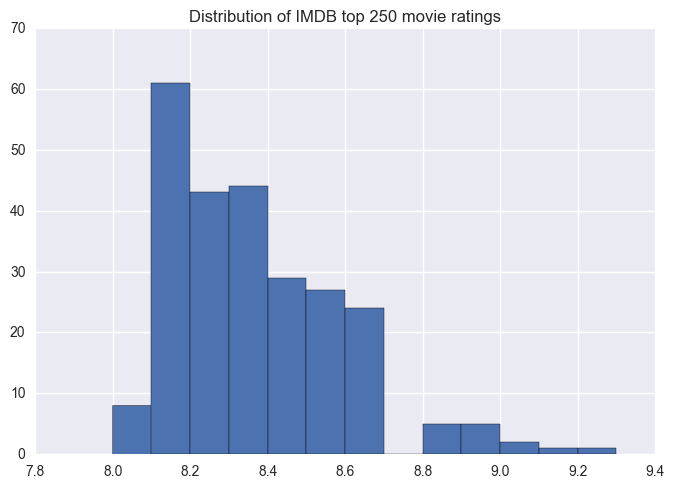

In [171]:
plt.hist(df['rating'], bins=13)
plt.title('Distribution of IMDB top 250 movie ratings')
plt.show()

In [162]:
from datetime import datetime
df['year'] = df['year'].astype(int)

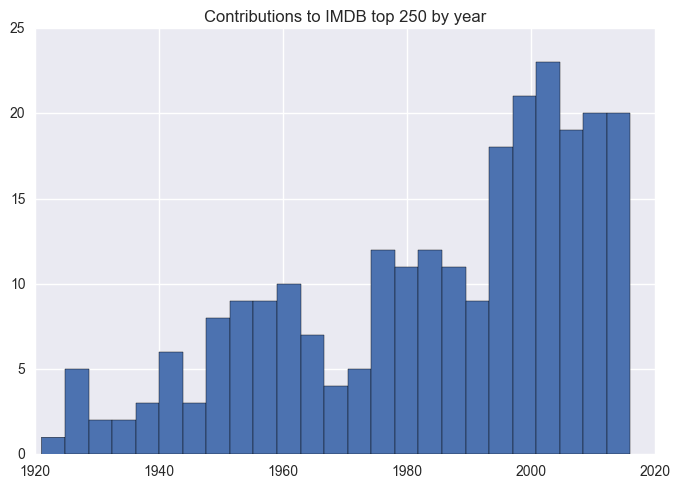

In [170]:
plt.hist(df['year'], bins =25)
plt.title("Contributions to IMDB top 250 by year")
plt.show()

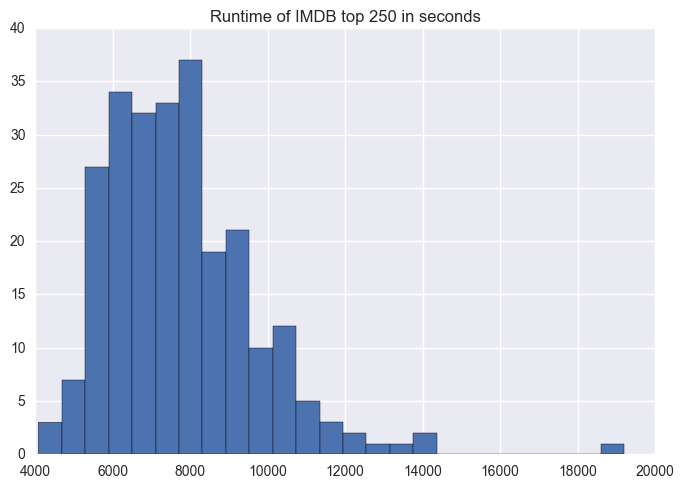

In [174]:
plt.hist(df['runtime'], bins =25)
plt.title("Runtime of IMDB top 250 in seconds")
plt.show()

The extreme outlier in this case is 'Gangs of Wasseypur'. This film was later split into two separate films. The initial length was 19200 seconds (more than 5 hours).

In [175]:
df_time = df.sort('runtime')

/Users/vincentbolwerk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [227]:
df = df_time.sort('rating', ascending=False)

/Users/vincentbolwerk/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [229]:
df['tagline'] = df['tagline'].fillna(value='I')

In [254]:
cv = CountVectorizer(max_features=50, stop_words='english')
data = cv.fit_transform(df.tagline).todense()
columns = [c for c in cv.get_feature_names()]
taglinedf = pd.DataFrame(data, columns=columns)
taglinedf.head()

,adventure,betrayal,change,choose,comes,crime,day,don,drama,film,...,summer,thing,time,true,ve,vengeance,war,way,wise,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
data = cv.fit_transform(df.outline).todense()
columns = [c for c in cv.get_feature_names()]
outlinedf = pd.DataFrame(data, columns=columns)
outlinedf.head()

,boy,child,city,corruption,crime,dead,empire,family,father,fight,...,time,tries,war,way,wife,woman,work,world,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
cv = CountVectorizer(max_features=50, stop_words='english')
data = cv.fit_transform(df['actor0']).todense()
columns = [c for c in cv.get_feature_names()]
actor = pd.DataFrame(data, columns=columns)
actor.head()

,aamir,al,anthony,bale,ben,bogart,bruce,chaplin,charles,christian,...,schwarzenegger,spacey,stewart,tom,toshir,welles,william,willis,wood,xf4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
genre1 = pd.get_dummies(df.loc[:,'genres0'], prefix = 'gen_')
genre2 = pd.get_dummies(df.loc[:,'genres1'], prefix = 'gen_')
genre3 = pd.get_dummies(df.loc[:,'genres2'], prefix = 'gen_')
genre4 = pd.get_dummies(df.loc[:,'genres3'], prefix = 'gen_')
genre12 = genre1.add(genre2, fill_value=0)
genre123 = genre12.add(genre3, fill_value = 0)
genre = genre123.add(genre4, fill_value = 0)

In [43]:
director1 = pd.get_dummies(df.loc[:,'director0'], prefix = 'dir_')
director2 = pd.get_dummies(df.loc[:,'director1'], prefix = 'dir_')
director = director1.add(director2, fill_value = 0)

In [44]:
actor1 = pd.get_dummies(df.loc[:,'actor0'], prefix = 'act_')
actor2 = pd.get_dummies(df.loc[:,'actor1'], prefix = 'act_')
actor3 = pd.get_dummies(df.loc[:,'actor2'], prefix = 'act_')
actor4 = pd.get_dummies(df.loc[:,'actor3'], prefix = 'act_')
actor12 = actor1.add(actor2, fill_value=0)
actor123 = actor12.add(actor3, fill_value = 0)
actor = actor123.add(actor4, fill_value = 0)

In [45]:
certification = pd.get_dummies(df['certification'], prefix = 'cert_')
certification.head()

KeyError: 'certification'

In [295]:
certification.columns = [str(col) + '_rat' for col in certification.columns]

In [259]:
director.columns = [str(col) + '_dir' for col in director.columns]

In [260]:
genre.columns = [str(col) + '_gen' for col in genre.columns]

In [261]:
actor.columns = [str(col) + '_act' for col in actor.columns]

In [262]:
taglinedf.columns = [str(col) + '_tag' for col in taglinedf.columns]

In [263]:
outlinedf.columns = [str(col) + '_out' for col in outlinedf.columns]

In [264]:
taglinedf = taglinedf.join(outlinedf)

In [265]:
taglinedf = taglinedf.join(director)

In [267]:
taglinedf = taglinedf.join(actor)

In [266]:
taglinedf = taglinedf.join(genre)

In [296]:
taglinedf = taglinedf.join(certification)

In [297]:
df_new = df.join(taglinedf)

In [51]:
p_20 = np.percentile(df['rating'], 20)
print p_20
p_40 = np.percentile(df['rating'], 40)
print p_40
p_60 = np.percentile(df['rating'], 60)
print p_60
p_80 = np.percentile(df['rating'], 80)
print p_80

8.1
8.2
8.3
8.5


In [52]:
for i in range(len(df['rating'])):
    if df.loc[i, 'rating']<p_20:
        df.loc[i, 'cat'] =1
    elif df.loc[i, 'rating']<p_40:
        df.loc[i, 'cat'] =2
    elif df.loc[i, 'rating']<p_60:
        df.loc[i, 'cat'] =3
    elif df.loc[i, 'rating']<p_80:
        df.loc[i, 'cat'] =4
    else:
        df.loc[i, 'cat'] =5

In [53]:
df

,num_votes,rating,tconst,title,type,year,director0,runtime,genres0,genres1,actor0,actor1,actor2,actor3,genres2,genres3,director1,genres4,genres5,cat
0,1730915,9.3,tt0111161,The Shawshank Redemption,feature,1994,Frank Darabont,8520.0,Crime,Drama,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,NaN,NaN,NaN,NaN,NaN,5.0
1,1182761,9.2,tt0068646,The Godfather,feature,1972,Francis Ford Coppola,10500.0,Crime,Drama,Marlon Brando,Al Pacino,James Caan,Diane Keaton,NaN,NaN,NaN,NaN,NaN,5.0
2,811039,9.0,tt0071562,The Godfather: Part II,feature,1974,Francis Ford Coppola,12120.0,Crime,Drama,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,NaN,NaN,NaN,NaN,NaN,5.0
3,1715862,9.0,tt0468569,The Dark Knight,feature,2008,Christopher Nolan,9120.0,Action,Crime,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,Drama,Thriller,NaN,NaN,NaN,5.0
4,462049,8.9,tt0050083,12 Angry Men,feature,1957,Sidney Lumet,5760.0,Crime,Drama,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,NaN,NaN,NaN,NaN,NaN,5.0
5,886601,8.9,tt0108052,Schindler's List,feature,1993,Steven Spielberg,11700.0,Biography,Drama,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,History,NaN,NaN,NaN,NaN,5.0
6,1355642,8.9,tt0110912,Pulp Fiction,feature,1994,Quentin Tarantino,9240.0,Crime,Drama,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,NaN,NaN,NaN,NaN,NaN,5.0
7,1243256,8.9,tt0167260,The Lord of the Rings: The Return of the King,feature,2003,Peter Jackson,12060.0,Adventure,Drama,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,Fantasy,NaN,NaN,NaN,NaN,5.0
8,515148,8.9,tt0060196,"The Good, the Bad and the Ugly",feature,1966,Sergio Leone,9660.0,Western,NaN,Clint Eastwood,Eli Wallach,Lee Van Cleef,Aldo Giuffr\xe8,NaN,NaN,NaN,NaN,NaN,5.0
9,1381858,8.8,tt0137523,Fight Club,feature,1999,David Fincher,8340.0,Drama,NaN,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,NaN,NaN,NaN,NaN,NaN,5.0


In [318]:
y_num = df_new['rating']

In [326]:
y=[]
for i in y_num:
    if i<8.5:
        y.append('8')
    elif i<9:
        y.append('8.5')
    else:
        y.append('9')

In [327]:
y

['9',
 '9',
 '9',
 '9',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8.5',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '8',
 '

In [300]:
X = df_new.loc[:, 'year':]

In [301]:
X = X.drop(X.loc[:, 'genres0':'actor3'],axis=1)

In [305]:
X

,year,certification,runtime,genre,adventure_tag,betrayal_tag,change_tag,choose_tag,comes_tag,crime_tag,...,13_rat,14_rat,16_rat,approved_rat,ma_rat,passed_rat,pg_rat,rated_rat,tv_rat,unrated_rat
0,1994,R,8520.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,R,10500.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1974,R,12120.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,PG-13,9120.0,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1966,Approved,9660.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2003,PG-13,12060.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1957,Approved,5760.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,1993,R,11700.0,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6,1994,R,9240.0,NaN,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,2001,PG-13,10680.0,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [304]:
X = X.drop(X.loc[:, 'genres2':'outline'],axis=1)

KeyError: 'genres2'

In [303]:
X.head()

,year,certification,runtime,genre,adventure_tag,betrayal_tag,change_tag,choose_tag,comes_tag,crime_tag,...,13_rat,14_rat,16_rat,approved_rat,ma_rat,passed_rat,pg_rat,rated_rat,tv_rat,unrated_rat
0,1994,R,8520.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1972,R,10500.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1974,R,12120.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2008,PG-13,9120.0,NaN,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,1966,Approved,9660.0,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
X = X.drop('genre',axis=1)

In [307]:
X = X.drop('certification', axis=1)

In [328]:
from sklearn.cross_validation import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [330]:
from sklearn.tree import DecisionTreeClassifier
treereg = DecisionTreeClassifier()
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [331]:
preds = treereg.predict(X_test)

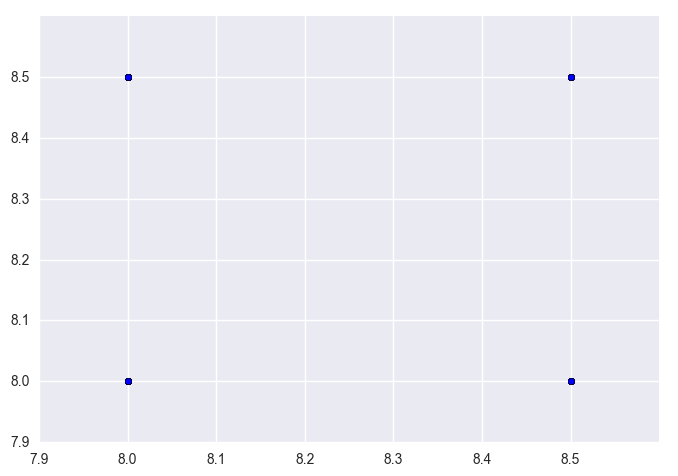

In [332]:
plt.scatter(y_test, preds)
plt.show()

In [333]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('S3') dtype('S3') dtype('S3')